In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix 

In [2]:
data=pd.read_csv(r"C:\Users\sourav\Desktop\project\28-02-24_New_rotavirus_ML\11-03-modified_data.csv")
print(data.isnull().sum())
data

Sample labelling in Record Book    0
Vomiting episodes per day          0
Vomiting duration (days)           0
Diarrhea duration (days)           0
Fever                              0
Maximum number of stools (days)    0
Dehydration                        0
Temperature                        0
Rotavirus (+ve/-ve) by ELISA       0
dtype: int64


,Sample labelling in Record Book,Vomiting episodes per day,Vomiting duration (days),Diarrhea duration (days),Fever,Maximum number of stools (days),Dehydration,Temperature,Rotavirus (+ve/-ve) by ELISA
0,RM1072018,0,2,3,+,10,2,Moderate,1
1,RM2072018,0,1,10,+,4,2,Moderate,1
2,RM3122015,1,1,6,+,5,2,Mild,0
3,RM3072018,3,1,4,+,3,2,Moderate,1
4,RM4122015,1,1,5,+,8,1,Mild,1
...,...,...,...,...,...,...,...,...,...
504,RM170032016,0,2,4,-,4,2,Mild,1
505,RM171032016,1,1,4,+,4,1,Moderate,1
506,RM172032016,2,1,4,+,2,1,Moderate,1
507,RM173032016,1,1,5,+,14,2,Moderate,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Sample labelling in Record Book  509 non-null    object
 1   Vomiting episodes per day        509 non-null    int64 
 2   Vomiting duration (days)         509 non-null    int64 
 3   Diarrhea duration (days)         509 non-null    int64 
 4   Fever                            509 non-null    object
 5   Maximum number of stools (days)  509 non-null    int64 
 6   Dehydration                      509 non-null    int64 
 7   Temperature                      509 non-null    object
 8   Rotavirus (+ve/-ve) by ELISA     509 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 35.9+ KB


In [4]:
data['Fever'].replace(['+','-'],[1,0],inplace=True)
data

,Sample labelling in Record Book,Vomiting episodes per day,Vomiting duration (days),Diarrhea duration (days),Fever,Maximum number of stools (days),Dehydration,Temperature,Rotavirus (+ve/-ve) by ELISA
0,RM1072018,0,2,3,1,10,2,Moderate,1
1,RM2072018,0,1,10,1,4,2,Moderate,1
2,RM3122015,1,1,6,1,5,2,Mild,0
3,RM3072018,3,1,4,1,3,2,Moderate,1
4,RM4122015,1,1,5,1,8,1,Mild,1
...,...,...,...,...,...,...,...,...,...
504,RM170032016,0,2,4,0,4,2,Mild,1
505,RM171032016,1,1,4,1,4,1,Moderate,1
506,RM172032016,2,1,4,1,2,1,Moderate,1
507,RM173032016,1,1,5,1,14,2,Moderate,1


In [5]:
data['Temperature'].value_counts()

Moderate    347
Mild        137
Normal       25
Name: Temperature, dtype: int64

In [6]:
data['Temperature'].replace(['Moderate','Mild','Normal'],[2,1,0],inplace=True)
data

,Sample labelling in Record Book,Vomiting episodes per day,Vomiting duration (days),Diarrhea duration (days),Fever,Maximum number of stools (days),Dehydration,Temperature,Rotavirus (+ve/-ve) by ELISA
0,RM1072018,0,2,3,1,10,2,2,1
1,RM2072018,0,1,10,1,4,2,2,1
2,RM3122015,1,1,6,1,5,2,1,0
3,RM3072018,3,1,4,1,3,2,2,1
4,RM4122015,1,1,5,1,8,1,1,1
...,...,...,...,...,...,...,...,...,...
504,RM170032016,0,2,4,0,4,2,1,1
505,RM171032016,1,1,4,1,4,1,2,1
506,RM172032016,2,1,4,1,2,1,2,1
507,RM173032016,1,1,5,1,14,2,2,1


## Data visualization

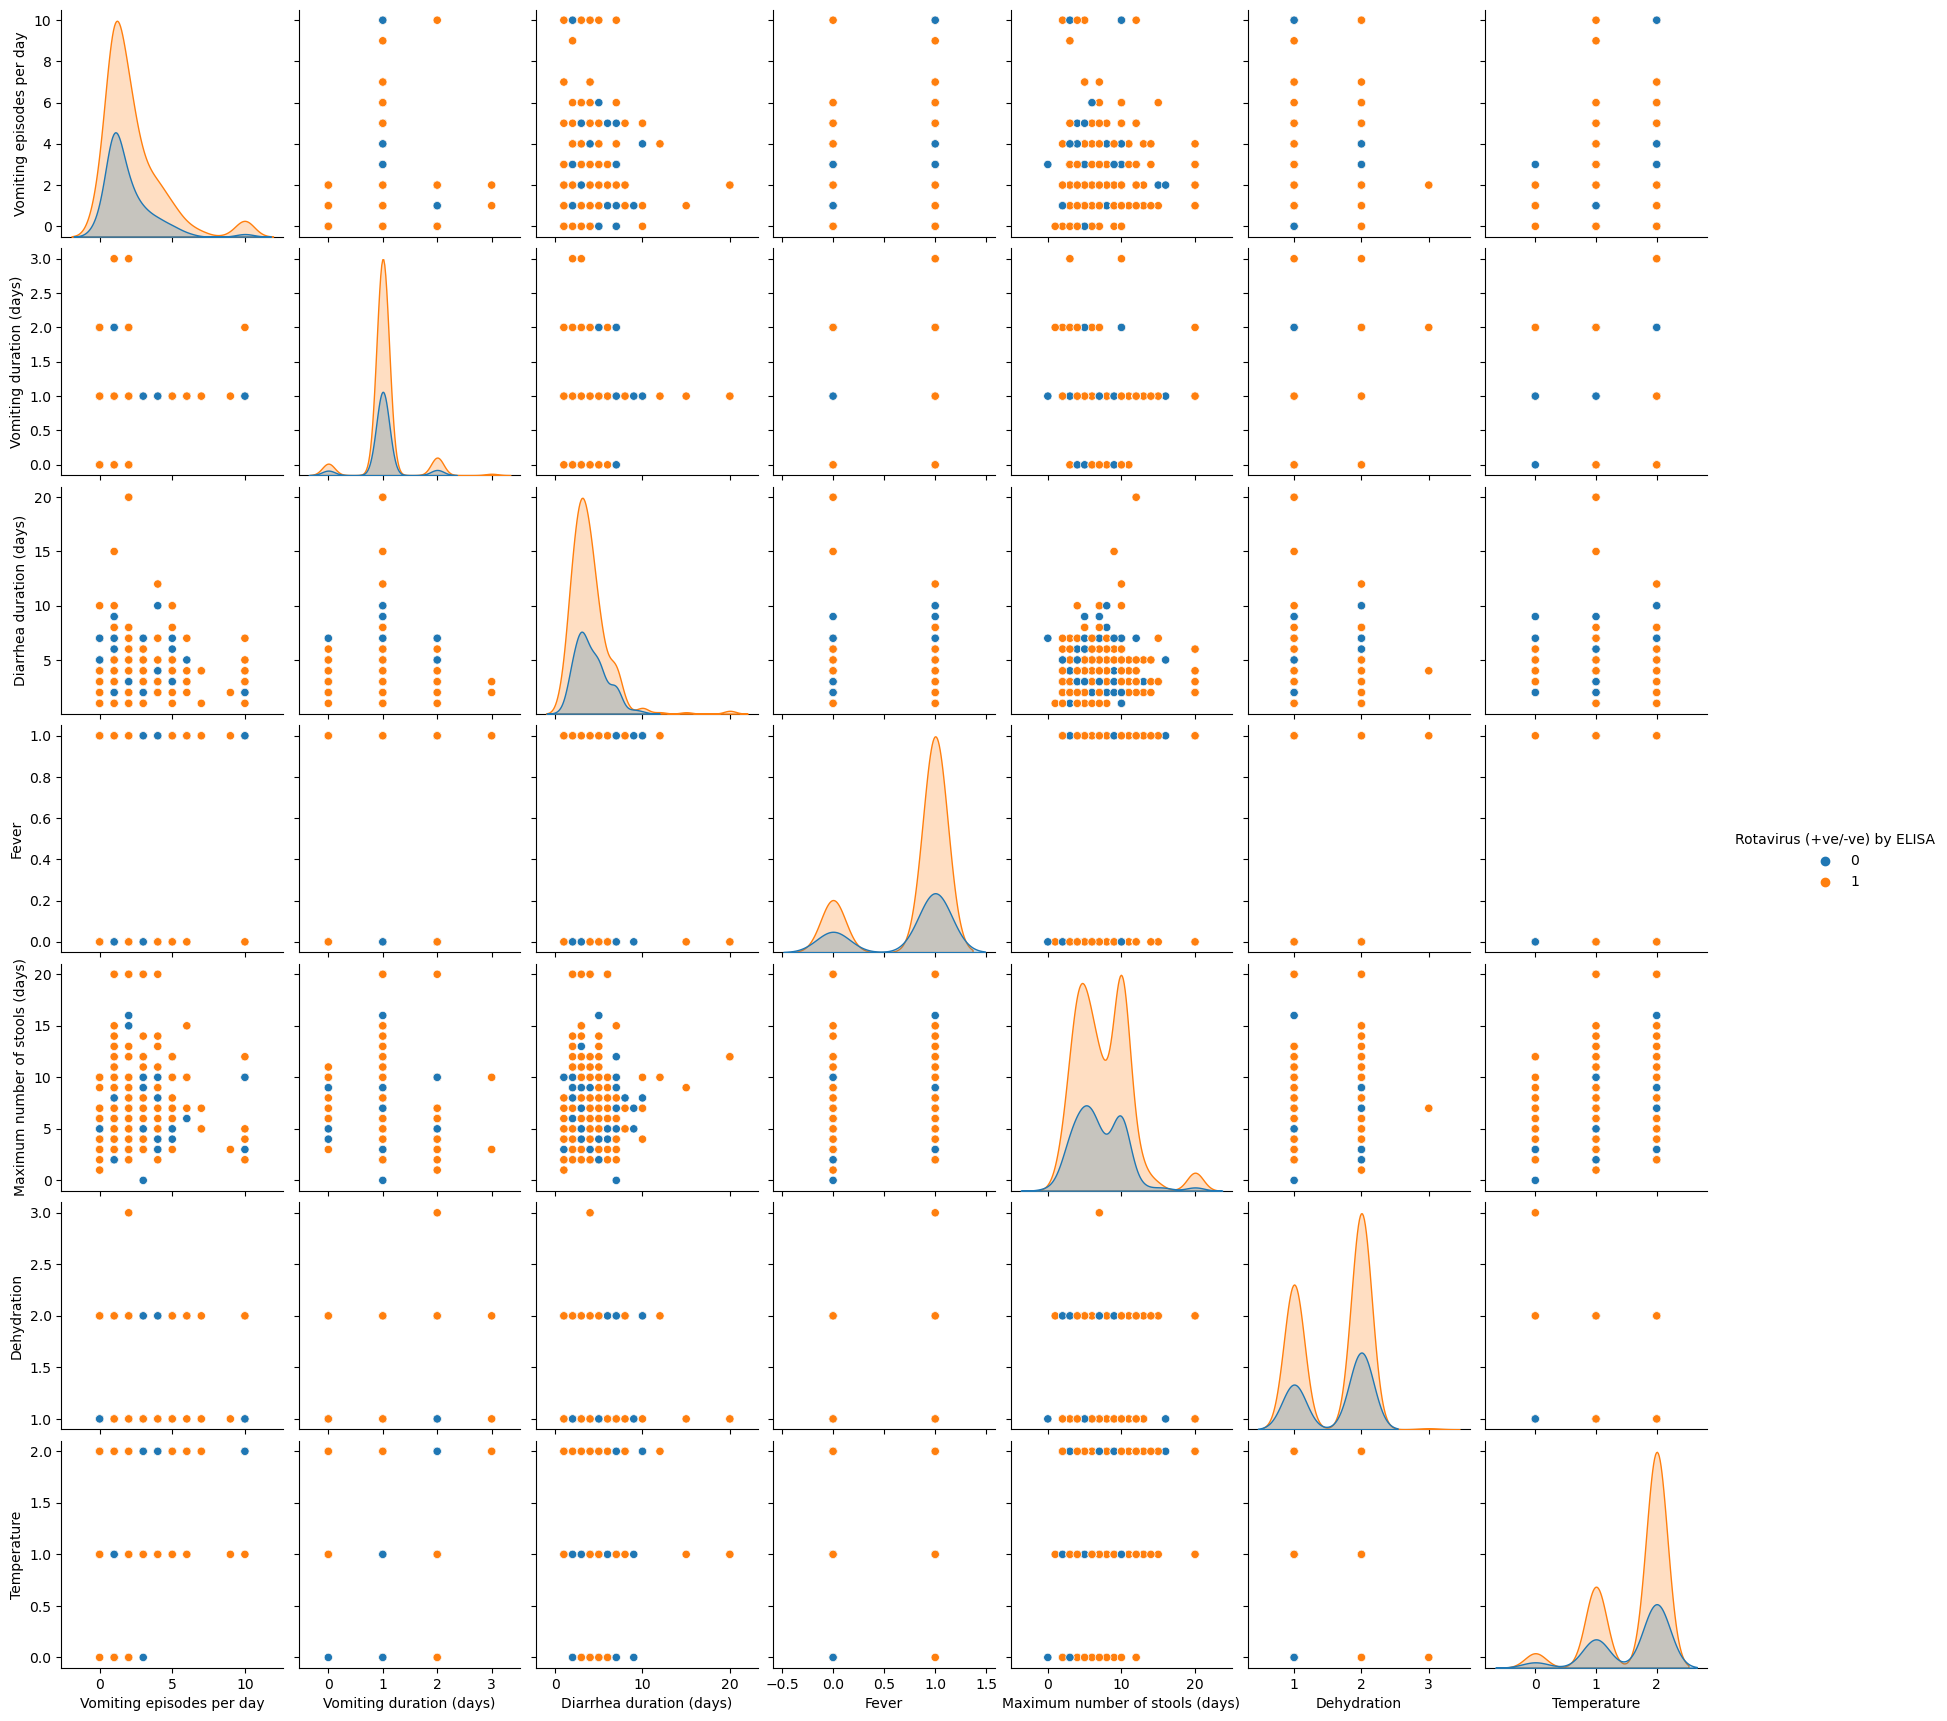

In [7]:
sns.pairplot(data,hue='Rotavirus (+ve/-ve) by ELISA')

<Axes: ylabel='Rotavirus (+ve/-ve) by ELISA'>

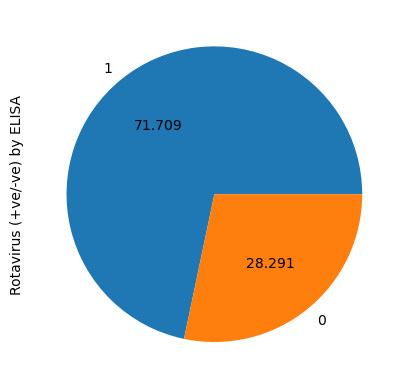

In [8]:
data['Rotavirus (+ve/-ve) by ELISA'].value_counts().plot(kind='pie',autopct='%0.3f')

<Axes: ylabel='Fever'>

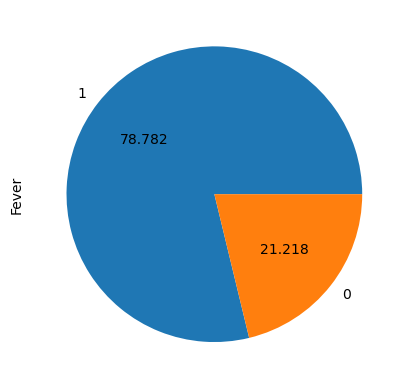

In [9]:
data['Fever'].value_counts().plot(kind='pie',autopct='%0.3f')

<Axes: ylabel='Dehydration'>

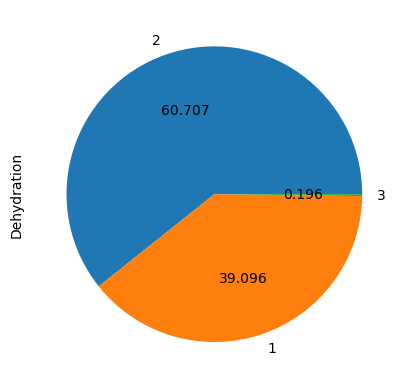

In [10]:
data['Dehydration'].value_counts().plot(kind='pie',autopct='%0.3f')

<Axes: ylabel='Temperature'>

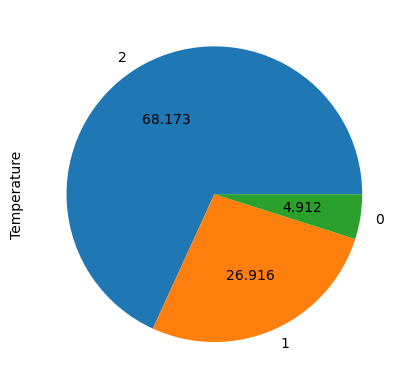

In [11]:
data['Temperature'].value_counts().plot(kind='pie',autopct='%0.3f')

### Distribution of data

<Axes: xlabel='Vomiting episodes per day', ylabel='Count'>

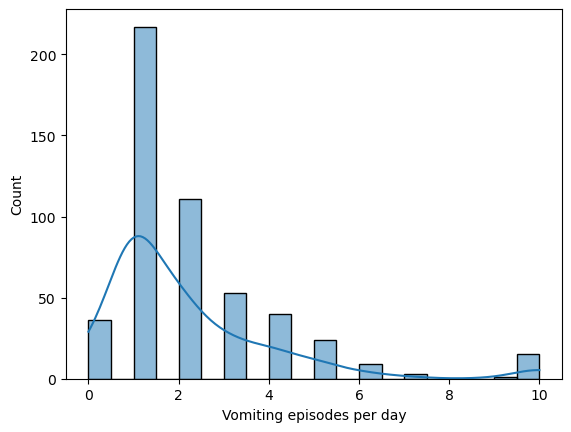

In [12]:
sns.histplot(data['Vomiting episodes per day'],kde=True)

<Axes: xlabel='Vomiting duration (days)', ylabel='Count'>

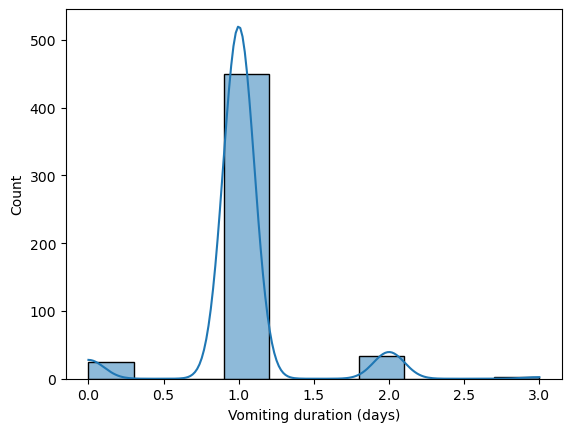

In [13]:
sns.histplot(data['Vomiting duration (days)'],kde=True)

<Axes: xlabel='Diarrhea duration (days)', ylabel='Count'>

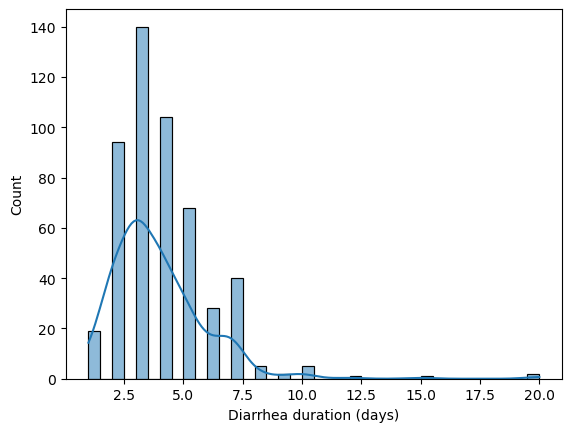

In [14]:
sns.histplot(data['Diarrhea duration (days)'],kde=True)

<Axes: xlabel='Maximum number of stools (days)', ylabel='Count'>

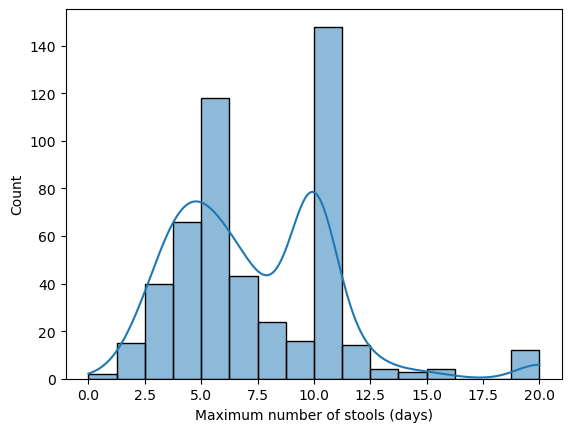

In [15]:
sns.histplot(data['Maximum number of stools (days)'],kde=True)

## Clusters of multivalued feature

Diarrhea duration (days)   1   2   3   4   5   6   7   8   9   10  12  15  20
Vomiting episodes per day                                                    
0                           4   3  12   7   4   0   5   0   0   1   0   0   0
1                           4  35  53  47  37  18  17   2   2   1   0   1   0
2                           5  23  32  22  15   5   5   2   0   0   0   0   2
3                           3  10  16   8   4   4   8   0   0   0   0   0   0
4                           0  13  12   9   2   0   2   0   0   1   1   0   0
5                           1   1   7   6   4   1   1   1   0   2   0   0   0
6                           0   1   5   1   1   0   1   0   0   0   0   0   0
7                           1   0   0   2   0   0   0   0   0   0   0   0   0
9                           0   1   0   0   0   0   0   0   0   0   0   0   0
10                          1   7   3   2   1   0   1   0   0   0   0   0   0


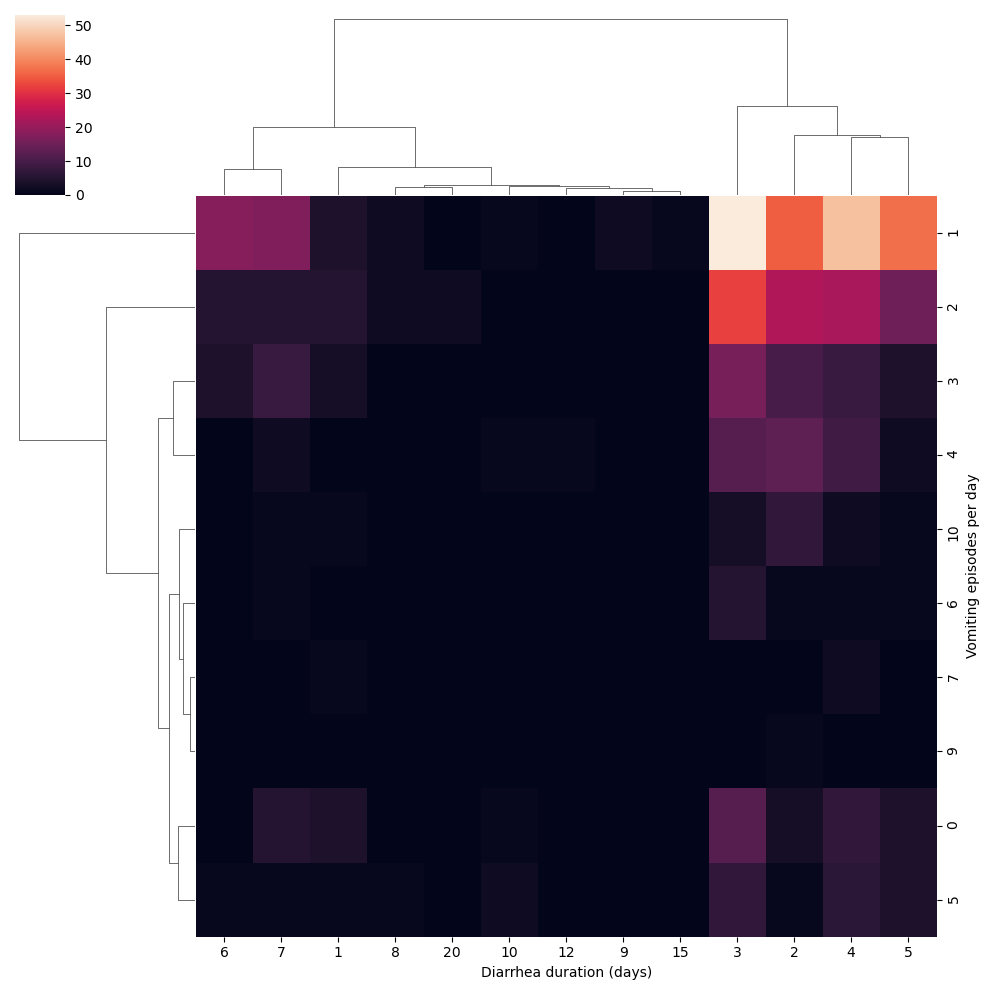

In [16]:
print(pd.crosstab(data['Vomiting episodes per day'],data['Diarrhea duration (days)']))
sns.clustermap(pd.crosstab(data['Vomiting episodes per day'],data['Diarrhea duration (days)']))

Diarrhea duration (days)         1   2   3   4   5   6   7   8   9   10  12  \
Maximum number of stools (days)                                               
0                                 0   0   0   0   0   0   1   0   0   0   0   
1                                 1   0   0   0   0   0   0   0   0   0   0   
2                                 2   2   3   2   4   1   1   0   0   0   0   
3                                 1  11  13   7   5   1   2   0   0   0   0   
4                                 5  12  15   9  14   4   6   0   0   1   0   
5                                 2  10  16  19   7   6   2   3   1   0   0   
6                                 1   8  14  13   7   4   5   0   0   0   0   
7                                 1   4  10  13   4   1   6   1   1   2   0   
8                                 1   6   4   2   4   4   1   1   0   1   0   
9                                 0   3   2   1   1   1   7   0   0   0   0   
10                                5  24  48  31  17 

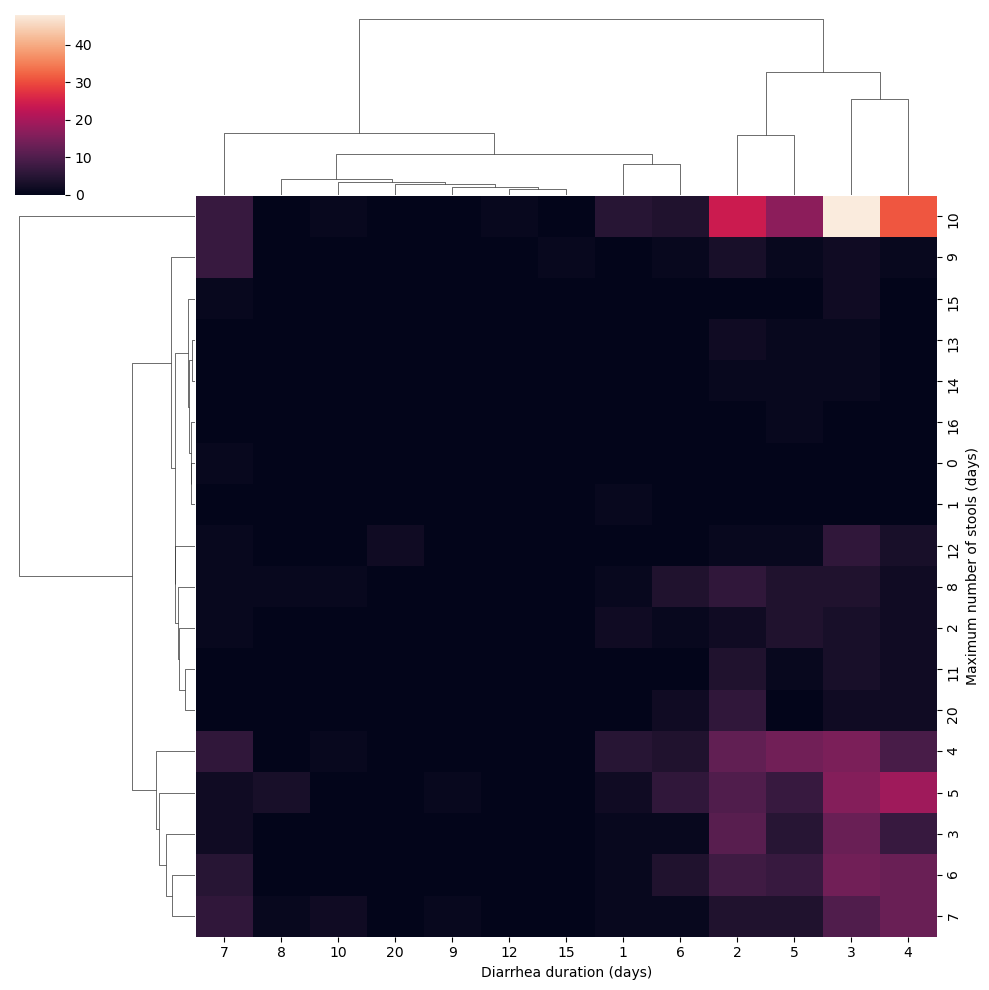

In [17]:
print(pd.crosstab(data['Maximum number of stools (days)'],data['Diarrhea duration (days)']))
sns.clustermap(pd.crosstab(data['Maximum number of stools (days)'],data['Diarrhea duration (days)']))

Maximum number of stools (days)  0   1   2   3   4   5   6   7   8   9   10  \
Vomiting episodes per day                                                     
0                                 0   1   1   4   8   6   3   2   0   1  10   
1                                 0   0   7  15  26  33  27  21  15   6  50   
2                                 0   0   5   7  12  14  15  11   4   2  30   
3                                 1   0   0   7  10   4   2   2   2   3  13   
4                                 0   0   1   4   8   3   1   2   2   4  10   
5                                 0   0   0   1   1   3   2   3   1   0  10   
6                                 0   0   0   0   0   0   2   1   0   0   5   
7                                 0   0   0   0   0   2   0   1   0   0   0   
9                                 0   0   0   1   0   0   0   0   0   0   0   
10                                0   0   1   1   1   1   0   0   0   0  10   

Maximum number of stools (days)  11  12  13  14  15

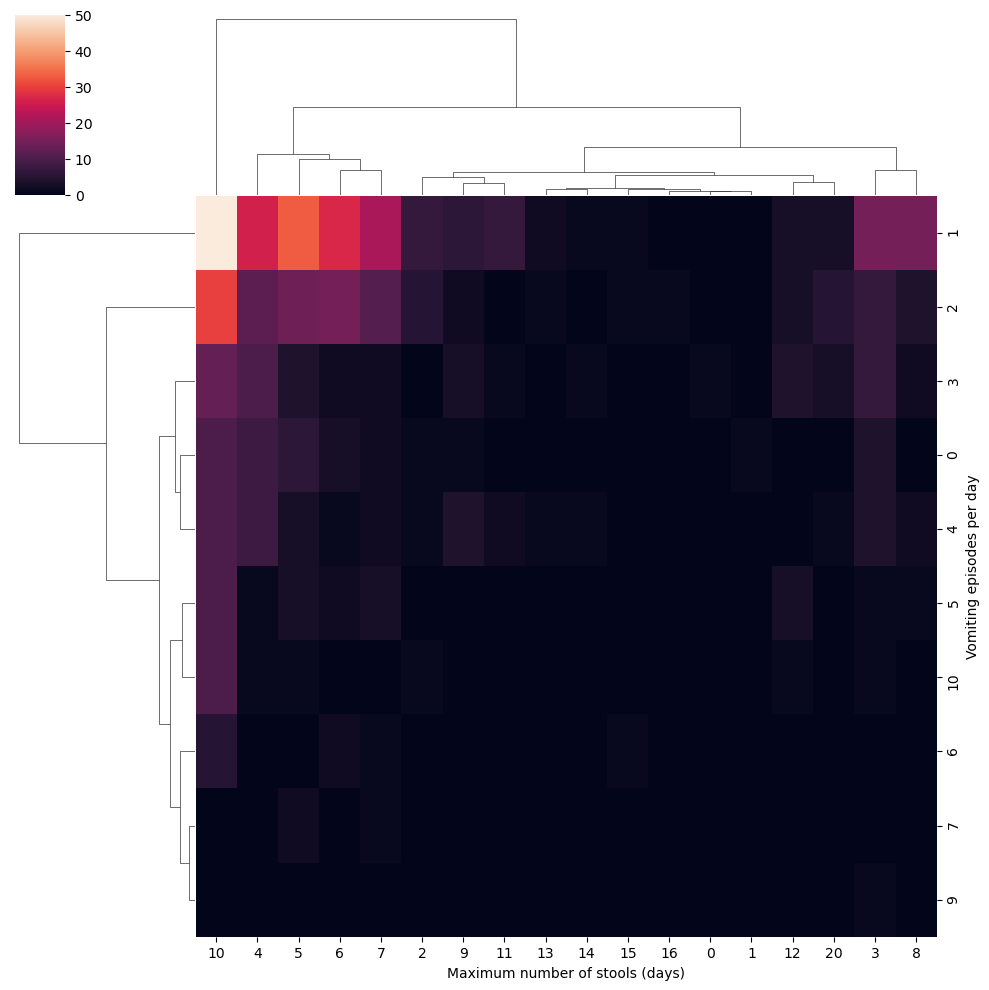

In [18]:
print(pd.crosstab(data['Vomiting episodes per day'],data['Maximum number of stools (days)']))
sns.clustermap(pd.crosstab(data['Vomiting episodes per day'],data['Maximum number of stools (days)']))

## Data visualization using pandas_profiling

In [19]:
from ydata_profiling import ProfileReport
report=ProfileReport(data)
report.to_file(output_file='Data_Report.html')

C:\Users\sourav\anaconda3\lib\site-packages\ydata_profiling\profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Correlation


C:\Users\sourav\AppData\Local\Temp\ipykernel_27992\3860099723.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


<Axes: >

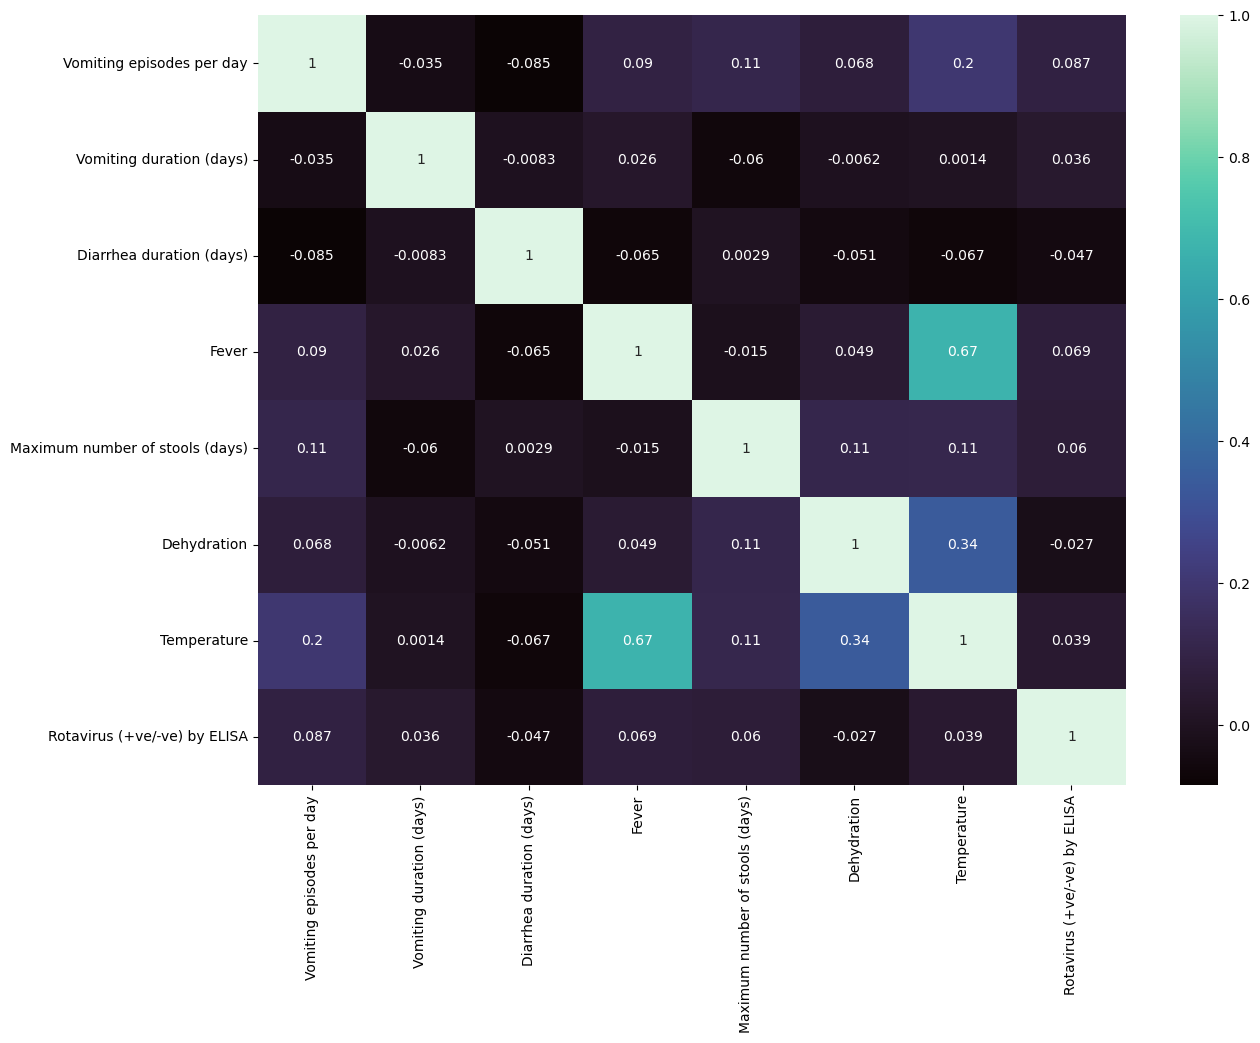

In [20]:
corr=data.corr()
plt.figure(figsize=(14,10))
sns.heatmap(data=corr,annot=True,cmap="mako")

In [21]:
x=data.drop(columns=['Sample labelling in Record Book','Rotavirus (+ve/-ve) by ELISA'],axis=1)
y=data['Rotavirus (+ve/-ve) by ELISA']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=12)

In [23]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y,test_size=0.2,random_state=27)

## SVM

In [24]:
from sklearn import svm

model_svm=svm.SVC(kernel='linear')
model_svm.fit(x_train,y_train)

y_predicted_train=model_svm.predict(x_train)
acc_train_svm=accuracy_score(y_train,y_predicted_train)

y_predicted_test=model_svm.predict(x_test)
acc_test_svm=accuracy_score(y_test,y_predicted_test)
    
print("TRAIN:",acc_train_svm,"TEST:",acc_test_svm)

precision_svm=precision_score(y_test,y_predicted_test)
recall_svm=recall_score(y_test,y_predicted_test)
f1_svm=f1_score(y_test,y_predicted_test,average='macro')

print("precision:",precision_svm)
print("recall:",recall_svm)
print("f_macro:",f1_svm)

y_pred_test_svm=model_svm.decision_function(x_test)
# probs_svm=model_svm.predict_proba(x_test)

cm_train=confusion_matrix(y_train,y_predicted_train)
cm_test=confusion_matrix(y_test,y_predicted_test)
print("TRAIN:",cm_train,"\n TEST:",cm_test)

kfold_validation=KFold(10)
print("Cross_val:",cross_val_score(model_svm,x,y,cv=kfold_validation).mean())

TRAIN: 0.7174447174447175 TEST: 0.7156862745098039
precision: 0.7156862745098039
recall: 1.0
f_macro: 0.4171428571428571
TRAIN: [[  0 115]
 [  0 292]] 
 TEST: [[ 0 29]
 [ 0 73]]
Cross_val: 0.7168627450980392


Text(0.5, 1.0, 'Confusion Matrix of SVM')

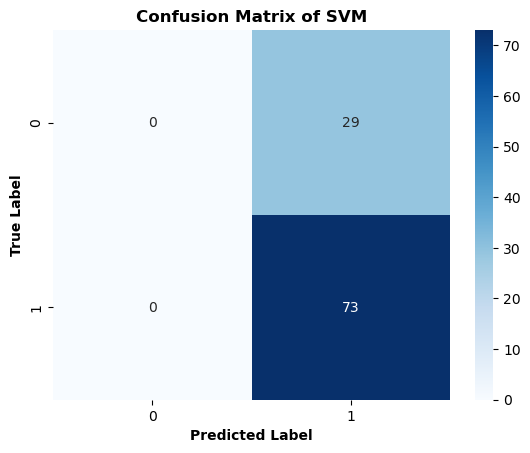

In [25]:
#------>
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm_test,cmap="Blues",annot=True,
           xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predicted Label",fontweight='bold')
plt.ylabel("True Label",fontweight='bold')
plt.title("Confusion Matrix of SVM",fontweight='bold')

# disp = plot_confusion_matrix(classifier,x_test,y_test)
# disp.ax_.set_title("Confusion Matrix")

# # Customize the color map for better visualization (optional)
# plt.cm.get_cmap('Blues')

# # Display the plot
# plt.show()

Text(0.5, 1.0, 'Confusion Matrix of SVM')

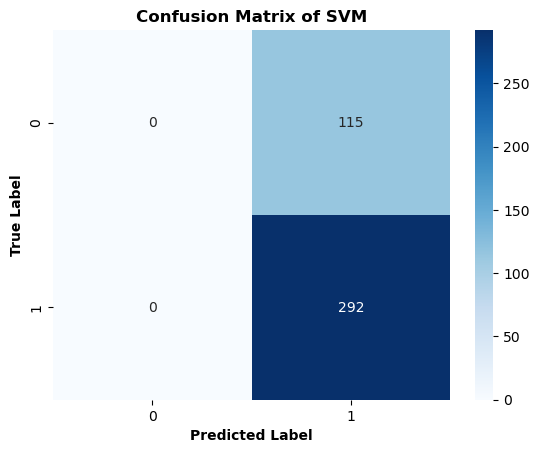

In [26]:
#------>cm_for train data
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm_train,cmap="Blues",annot=True,fmt='d',
           xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predicted Label",fontweight='bold')
plt.ylabel("True Label",fontweight='bold')
plt.title("Confusion Matrix of SVM",fontweight='bold')

# disp = plot_confusion_matrix(classifier,x_test,y_test)
# disp.ax_.set_title("Confusion Matrix")

# # Customize the color map for better visualization (optional)
# plt.cm.get_cmap('Blues')

# # Display the plot
# plt.show()

In [27]:
from sklearn import svm

model_svm=svm.SVC(kernel='linear')
model_svm.fit(x1_train,y1_train)

y1_predicted_train=model_svm.predict(x1_train)
acc_train_svm=accuracy_score(y1_train,y1_predicted_train)

y1_predicted_test=model_svm.predict(x1_test)
acc_test_svm=accuracy_score(y1_test,y1_predicted_test)
    
print("TRAIN:",acc_train_svm,"TEST:",acc_test_svm)

precision_svm=precision_score(y1_test,y1_predicted_test)
recall_svm=recall_score(y1_test,y1_predicted_test)
f1_svm=f1_score(y1_test,y1_predicted_test,average='macro')

print("precision:",precision_svm)
print("recall:",recall_svm)
print("f_macro:",f1_svm)

y1_pred_test_svm=model_svm.decision_function(x1_test)
# probs_svm=model_svm.predict_proba(x_test)

cm_train=confusion_matrix(y1_train,y1_predicted_train)
cm_test=confusion_matrix(y1_test,y1_predicted_test)
print("TRAIN:",cm_train,"\n TEST:",cm_test)

kfold_validation=KFold(10)
print("Cross_val:",cross_val_score(model_svm,x,y,cv=kfold_validation).mean())

TRAIN: 0.683046683046683 TEST: 0.8529411764705882
precision: 0.8529411764705882
recall: 1.0
f_macro: 0.4603174603174603
TRAIN: [[  0 129]
 [  0 278]] 
 TEST: [[ 0 15]
 [ 0 87]]
Cross_val: 0.7168627450980392


In [59]:
from sklearn.model_selection import ShuffleSplit
s_split=ShuffleSplit(n_splits=10,test_size=0.2)
cross_val_score(model_svm,x,y,cv=s_split).mean()

0.711764705882353

## KNN

In [28]:
print(len(y))
import math
print(math.sqrt(len(y)))

509
22.561028345356956


In [29]:
from sklearn.neighbors import KNeighborsClassifier

model_knn=KNeighborsClassifier(n_neighbors=23)
model_knn.fit(x_train,y_train)

y_predicted_train_knn=model_knn.predict(x_train)
acc_train_knn=accuracy_score(y_train,y_predicted_train)

y_predicted_test_knn=model_knn.predict(x_test)
acc_test_knn=accuracy_score(y_test,y_predicted_test)

print("TRAIN:",acc_train_knn,"TEST:",acc_test_knn)

precision_knn=precision_score(y_test,y_predicted_test)
recall_knn=recall_score(y_test,y_predicted_test)
f_macro_knn=f1_score(y_test,y_predicted_test,average='macro')

probs_knn=model_knn.predict_proba(x_test)


print("precision:",precision_knn)
print("recall:",recall_knn)
print("f_macro:",f_macro_knn)

cm_train_knn=confusion_matrix(y_train,y_predicted_train_knn)
cm_test_knn=confusion_matrix(y_test,y_predicted_test_knn)
print("TRAIN:",cm_train_knn,"\n TEST:",cm_test_knn)

kfold_validation=KFold(10)
print("Cross_val:",cross_val_score(model_svm,x,y,cv=kfold_validation).mean())

TRAIN: 0.7174447174447175 TEST: 0.7156862745098039
precision: 0.7156862745098039
recall: 1.0
f_macro: 0.4171428571428571
TRAIN: [[  1 114]
 [  3 289]] 
 TEST: [[ 0 29]
 [ 2 71]]
Cross_val: 0.7168627450980392


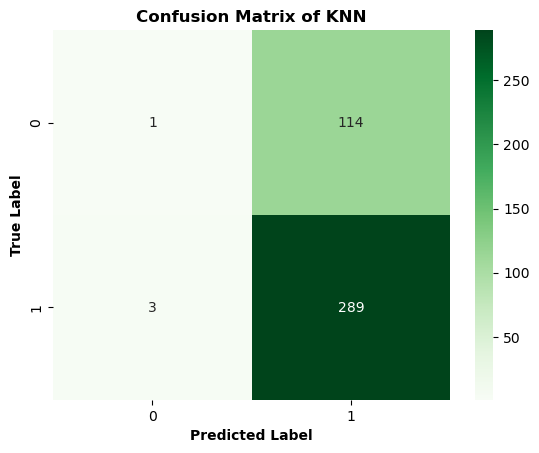

In [30]:
#------>cm for train data
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm_train_knn,cmap="Greens",annot=True,fmt='d',
           xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predicted Label",fontweight='bold')
plt.ylabel("True Label",fontweight='bold')
plt.title("Confusion Matrix of KNN",fontweight='bold')

# disp = plot_confusion_matrix(classifier,x_test,y_test)
# disp.ax_.set_title("Confusion Matrix")

# # Customize the color map for better visualization (optional)
# plt.cm.get_cmap('Blues')

# # Display the plot
plt.show()

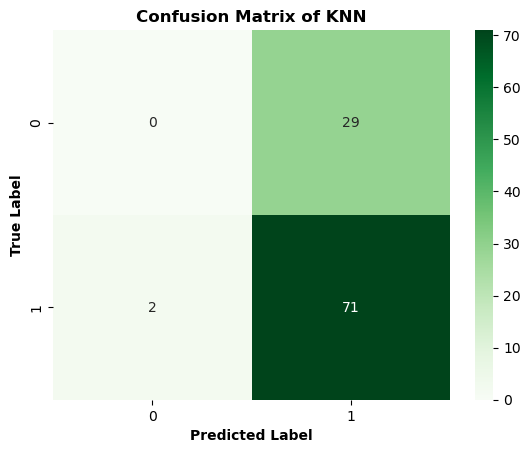

In [31]:
#------>
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm_test_knn,cmap="Greens",annot=True,fmt='d',
           xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predicted Label",fontweight='bold')
plt.ylabel("True Label",fontweight='bold')
plt.title("Confusion Matrix of KNN",fontweight='bold')

# disp = plot_confusion_matrix(classifier,x_test,y_test)
# disp.ax_.set_title("Confusion Matrix")

# # Customize the color map for better visualization (optional)
# plt.cm.get_cmap('Blues')

# # Display the plot
plt.show()

In [58]:
from sklearn.model_selection import ShuffleSplit
s_split=ShuffleSplit(n_splits=10,test_size=0.2)
cross_val_score(model_knn,x,y,cv=s_split).mean()

0.7245098039215686

## Linear  Regression

In [32]:
from sklearn.linear_model import LinearRegression
 

model_lnr = LinearRegression()

model_lnr.fit(x_train, y_train)
y_pred_train = model_lnr.predict(x_train)
y_pred_test = model_lnr.predict(x_test)

# Convert predictions to binary values (0 and 1) using a threshold

threshold = 0.6
y_pred_train_binary = [1 if pred >= threshold else 0 for pred in y_pred_train]
y_pred_test_binary = [1 if pred >= threshold else 0 for pred in y_pred_test]

acc_train = accuracy_score(y_train, y_pred_train_binary)
acc_test = accuracy_score(y_test, y_pred_test_binary)
# if((acc_train>=acc_test)&(acc_test>=0.7)&(acc_train>=0.72)):
        
print("TRAIN:",acc_train,"TEST:", acc_test)

precision_linar_r=precision_score(y_test,y_predicted_test)
recall_linar_r=recall_score(y_test,y_predicted_test)
f1_linar_r=f1_score(y_test,y_predicted_test,average='macro')

print("precision:",precision_linar_r)
print("recall:",recall_linar_r)
print("f_macro:",f1_linar_r)

cm_train_lnr=confusion_matrix(y_train, y_pred_train_binary)
cm_test_lnr=confusion_matrix(y_test, y_pred_test_binary)

print("TRAIN:",cm_train_lnr,"\n TEST:",cm_test_lnr)

kfold_validation=KFold(10)
print("Cross_val:",cross_val_score(model_lnr,x,y,cv=kfold_validation).mean())

TRAIN: 0.714987714987715 TEST: 0.6568627450980392
precision: 0.7156862745098039
recall: 1.0
f_macro: 0.4171428571428571
TRAIN: [[ 26  89]
 [ 27 265]] 
 TEST: [[ 1 28]
 [ 7 66]]
Cross_val: -0.09581478672941429


Text(0.5, 1.0, 'Confusion Matrix of Linear Regression')

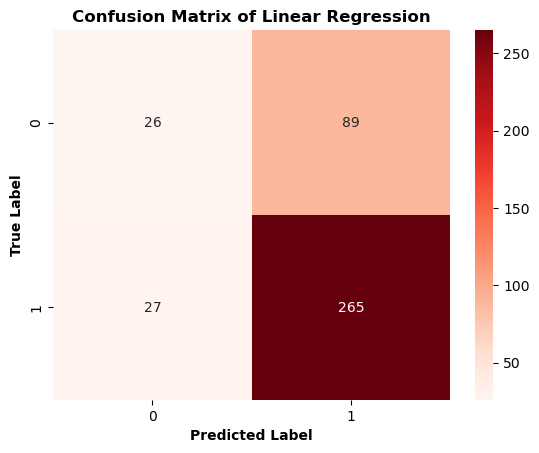

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm_train_lnr,cmap="Reds",annot=True,fmt='d',
           xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predicted Label",fontweight='bold')
plt.ylabel("True Label",fontweight='bold')
plt.title("Confusion Matrix of Linear Regression",fontweight='bold')

# disp = plot_confusion_matrix(classifier,x_test,y_test)
# disp.ax_.set_title("Confusion Matrix")

# # Customize the color map for better visualization (optional)
# plt.cm.get_cmap('Blues')

# # Display the plot
# plt.show()

Text(0.5, 1.0, 'Confusion Matrix of Linear Regression')

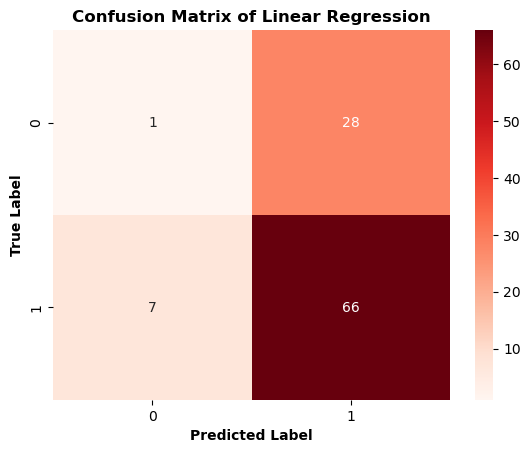

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm_test_lnr,cmap="Reds",annot=True,fmt='d',
           xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predicted Label",fontweight='bold')
plt.ylabel("True Label",fontweight='bold')
plt.title("Confusion Matrix of Linear Regression",fontweight='bold')

# disp = plot_confusion_matrix(classifier,x_test,y_test)
# disp.ax_.set_title("Confusion Matrix")

# # Customize the color map for better visualization (optional)
# plt.cm.get_cmap('Blues')

# # Display the plot
# plt.show()

In [35]:
from sklearn.model_selection import ShuffleSplit
s_split=ShuffleSplit(n_splits=10,test_size=0.2)
cross_val_score(model_lnr,x,y,cv=s_split).mean()

-0.03532387567217077

## Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

model_logistic_R = LogisticRegression()
model_logistic_R.fit(x_train,y_train)

y_predicted_train=model_logistic_R.predict(x_train)
acc_train=accuracy_score(y_train,y_predicted_train)

y_predicted_test=model_logistic_R.predict(x_test)
acc_test=accuracy_score(y_test,y_predicted_test)

print("TRAIN:",acc_train,"TEST:",acc_test)

precision_log_r=precision_score(y_test,y_predicted_test)
recall_log_r=recall_score(y_test,y_predicted_test)
f1_log_r=f1_score(y_test,y_predicted_test,average='macro')

print("precision:",precision_log_r)
print("recall:",recall_log_r)
print("f_macro:",f1_log_r)

cm_train_logiR=confusion_matrix(y_train,y_predicted_train)
cm_test_logiR=confusion_matrix(y_test,y_predicted_test)
print("TRAIN:",cm_train_logiR,"\n TEST:",cm_test_logiR)
y_pred_Logistic_R=model_logistic_R.decision_function(x_test)

kfold_validation=KFold(10)
print("Cross_val:",cross_val_score(model_logistic_R,x,y,cv=kfold_validation).mean())

TRAIN: 0.7174447174447175 TEST: 0.7156862745098039
precision: 0.7156862745098039
recall: 1.0
f_macro: 0.4171428571428571
TRAIN: [[  1 114]
 [  1 291]] 
 TEST: [[ 0 29]
 [ 0 73]]
Cross_val: 0.7090196078431371


Text(0.5, 1.0, 'Confusion Matrix of Logistic Regression')

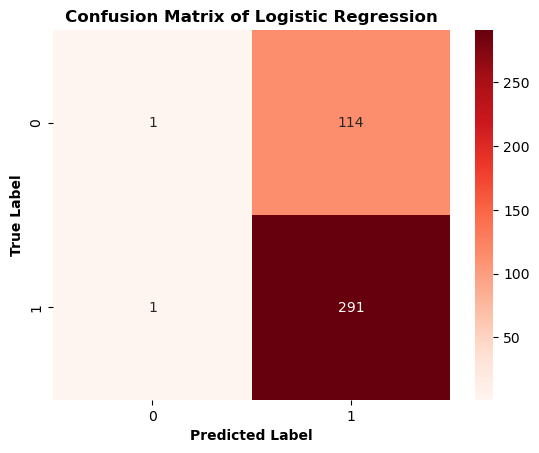

In [37]:
#----> cm for train data
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm_train_logiR,cmap="Reds",annot=True,fmt='d',
           xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predicted Label",fontweight='bold')
plt.ylabel("True Label",fontweight='bold')
plt.title("Confusion Matrix of Logistic Regression",fontweight='bold')

# disp = plot_confusion_matrix(classifier,x_test,y_test)
# disp.ax_.set_title("Confusion Matrix")

# # Customize the color map for better visualization (optional)
# plt.cm.get_cmap('Blues')

# # Display the plot
# plt.show()

Text(0.5, 1.0, 'Confusion Matrix of Logistic Regression')

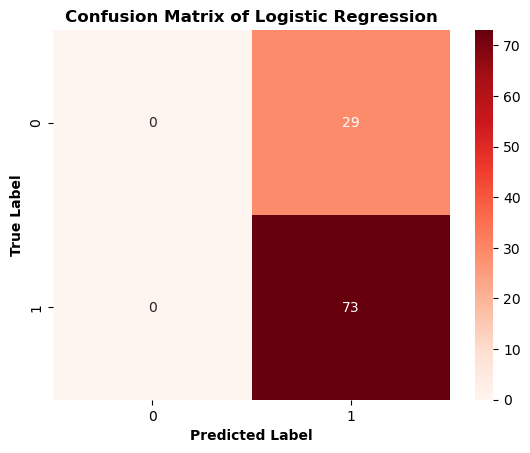

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm_test_logiR,cmap="Reds",annot=True,
           xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predicted Label",fontweight='bold')
plt.ylabel("True Label",fontweight='bold')
plt.title("Confusion Matrix of Logistic Regression",fontweight='bold')

# disp = plot_confusion_matrix(classifier,x_test,y_test)
# disp.ax_.set_title("Confusion Matrix")

# # Customize the color map for better visualization (optional)
# plt.cm.get_cmap('Blues')

# # Display the plot
# plt.show()

In [39]:
from sklearn.model_selection import ShuffleSplit
s_split=ShuffleSplit(test_size=0.2)
cross_val_score(model_logistic_R,x,y,cv=s_split).mean()

0.7215686274509804

In [40]:
from sklearn.linear_model import LogisticRegression

model_logistic_R = LogisticRegression()
model_logistic_R.fit(x1_train,y1_train)

y1_predicted_train=model_logistic_R.predict(x1_train)
acc_train=accuracy_score(y1_train,y_predicted_train)

y1_predicted_test=model_logistic_R.predict(x1_test)
acc_test=accuracy_score(y1_test,y1_predicted_test)

print("TRAIN:",acc_train,"TEST:",acc_test)

precision_log_r=precision_score(y1_test,y1_predicted_test)
recall_log_r=recall_score(y1_test,y1_predicted_test)
f1_log_r=f1_score(y1_test,y1_predicted_test)

print("precision:",precision_log_r)
print("recall:",recall_log_r)
print("f1:",f1_log_r)

cm_train_logiR=confusion_matrix(y1_train,y1_predicted_train)
cm_test_logiR=confusion_matrix(y1_test,y1_predicted_test)
print("TRAIN:",cm_train_logiR,"\n TEST:",cm_test_logiR)
y1_pred_Logistic_R=model_logistic_R.decision_function(x1_test)

kfold_validation=KFold(10)
print("Cross_val:",cross_val_score(model_logistic_R,x,y,cv=kfold_validation).mean())

TRAIN: 0.6781326781326781 TEST: 0.8431372549019608
precision: 0.8514851485148515
recall: 0.9885057471264368
f1: 0.9148936170212766
TRAIN: [[  0 129]
 [  5 273]] 
 TEST: [[ 0 15]
 [ 1 86]]
Cross_val: 0.7090196078431371


## Naive Bayes

In [41]:
#Final

from sklearn.naive_bayes import GaussianNB

model_naive_bayes=GaussianNB()
model_naive_bayes.fit(x1_train,y1_train)
 
y1_predicted_test=model_naive_bayes.predict(x1_test)
acc_test=accuracy_score(y1_test,y1_predicted_test)
y1_predicted_train=model_naive_bayes.predict(x1_train)
acc_train=accuracy_score(y1_train,y1_predicted_train)

print("TRAIN:",acc_train,"TEST:",acc_test)

precision_nb=precision_score(y1_test,y1_predicted_test)
recall_nb=recall_score(y1_test,y1_predicted_test)
f1_nb=f1_score(y1_test,y1_predicted_test,average='macro')

print("precision:",precision_nb)
print("recall:",recall_nb)
print("f_macro:",f1_nb)

# y_pred_naive_bayes=model_svm.decision_function(x_test)
probs_naive=model_naive_bayes.predict_proba(x1_test)


cm_test_naive=confusion_matrix(y1_test,y1_predicted_test)
cm_train_naive=confusion_matrix(y1_train,y1_predicted_train)

print("TRAIN:",cm_train_naive,"\n TEST:",cm_test_naive)


kfold_validation=KFold(10)
print("Cross_val:",cross_val_score(model_naive_bayes,x,y,cv=kfold_validation).mean())

TRAIN: 0.6732186732186732 TEST: 0.8333333333333334
precision: 0.8804347826086957
recall: 0.9310344827586207
f_macro: 0.612513966480447
TRAIN: [[ 20 109]
 [ 24 254]] 
 TEST: [[ 4 11]
 [ 6 81]]
Cross_val: 0.681686274509804


Text(0.5, 1.0, 'Confusion Matrix of Naive Bayes')

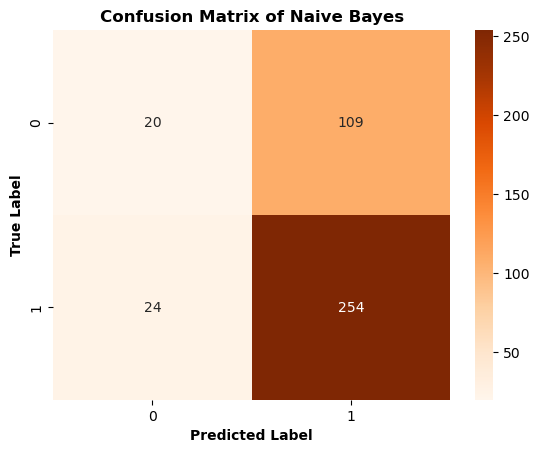

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm_train_naive,cmap="Oranges",annot=True,fmt='d',
           xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predicted Label",fontweight='bold')
plt.ylabel("True Label",fontweight='bold')
plt.title("Confusion Matrix of Naive Bayes",fontweight='bold')

# disp = plot_confusion_matrix(classifier,x_test,y_test)
# disp.ax_.set_title("Confusion Matrix")

# # Customize the color map for better visualization (optional)
# plt.cm.get_cmap('Blues')

# # Display the plot
# plt.show()

Text(0.5, 1.0, 'Confusion Matrix of Naive Bayes')

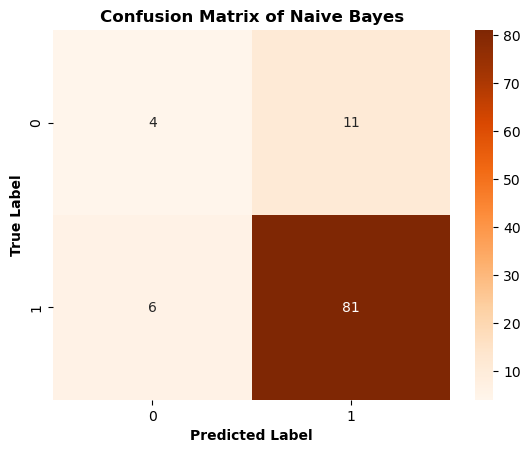

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm_test_naive,cmap="Oranges",annot=True,
           xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predicted Label",fontweight='bold')
plt.ylabel("True Label",fontweight='bold')
plt.title("Confusion Matrix of Naive Bayes",fontweight='bold')

# disp = plot_confusion_matrix(classifier,x_test,y_test)
# disp.ax_.set_title("Confusion Matrix")

# # Customize the color map for better visualization (optional)
# plt.cm.get_cmap('Blues')

# # Display the plot
# plt.show()

In [44]:
from sklearn.model_selection import ShuffleSplit
s_split=ShuffleSplit(n_splits=10,test_size=0.2)
cross_val_score(model_naive_bayes,x,y,cv=s_split).mean()

0.6852941176470588

## Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier 


np.random.seed(0)
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y,test_size=0.2,random_state=27)
model_decision_tree=DecisionTreeClassifier(criterion='entropy',max_depth=11)
model_decision_tree.fit(x1_train,y1_train)

y1_predicted_train_dt=model_decision_tree.predict(x1_train)
acc_train=accuracy_score(y1_train,y1_predicted_train_dt)

y1_predicted_test_dt=model_decision_tree.predict(x1_test)
acc_test=accuracy_score(y1_test,y1_predicted_test_dt)
print("TRAIN",acc_train,"TEST",acc_test)

precision_dt=precision_score(y1_test,y1_predicted_test_dt)
recall_dt=recall_score(y1_test,y1_predicted_test_dt)
f1_dt=f1_score(y1_test,y1_predicted_test_dt,average='macro')

print("precision:",precision_dt)
print("recall:",recall_dt)
print("f_macro:",f1_dt)

# y_pred_dt=model_decision_tree.decision_function(x_test)
probs_dt=model_decision_tree.predict_proba(x1_test)


cm_test_dt=confusion_matrix(y1_test,y1_predicted_test_dt)
cm_train_dt=confusion_matrix(y1_train,y1_predicted_train_dt)

print("TRAIN:",cm_train_dt,"\n TEST:",cm_test_dt)

kfold_validation=KFold(10)
print("Cross_val:",cross_val_score(model_decision_tree,x,y,cv=kfold_validation).mean())

#---->
# import seaborn as sns
# import matplotlib.pyplot as plt
# sns.heatmap(cm_test_dt,cmap="Reds",annot=True,
#            xticklabels=[0,1],yticklabels=[0,1])
# plt.xlabel("Predicted Label",fontweight='bold')
# plt.ylabel("True Label",fontweight='bold')
# plt.title("Confusion Matrix of Decision Tree",fontweight='bold')

# disp = plot_confusion_matrix(classifier,x_test,y_test)
# disp.ax_.set_title("Confusion Matrix")

# # Customize the color map for better visualization (optional)
# plt.cm.get_cmap('Blues')

# # Display the plot
# plt.show()


TRAIN 0.8034398034398035 TEST 0.7647058823529411
precision: 0.8987341772151899
recall: 0.8160919540229885
f_macro: 0.6119213696892835
TRAIN: [[ 77  52]
 [ 28 250]] 
 TEST: [[ 7  8]
 [16 71]]
Cross_val: 0.6285490196078432


Text(0.5, 1.0, 'Confusion Matrix of Decision Tree')

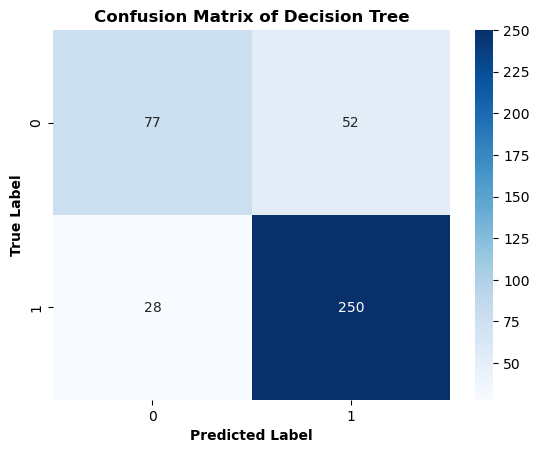

In [46]:
#---> cm_train data

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm_train_dt,cmap="Blues",annot=True,fmt='d',
           xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predicted Label",fontweight='bold')
plt.ylabel("True Label",fontweight='bold')
plt.title("Confusion Matrix of Decision Tree",fontweight='bold')

# disp = plot_confusion_matrix(classifier,x_test,y_test)
# disp.ax_.set_title("Confusion Matrix")

# # Customize the color map for better visualization (optional)
# plt.cm.get_cmap('Blues')

# # Display the plot
# plt.show()

Text(0.5, 1.0, 'Confusion Matrix of Decision Tree')

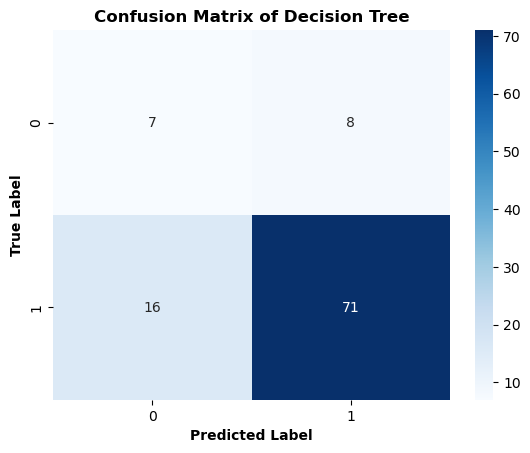

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm_test_dt,cmap="Blues",annot=True,
           xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predicted Label",fontweight='bold')
plt.ylabel("True Label",fontweight='bold')
plt.title("Confusion Matrix of Decision Tree",fontweight='bold')

# disp = plot_confusion_matrix(classifier,x_test,y_test)
# disp.ax_.set_title("Confusion Matrix")

# # Customize the color map for better visualization (optional)
# plt.cm.get_cmap('Blues')

# # Display the plot
# plt.show()

In [48]:
from sklearn.model_selection import ShuffleSplit
s_split=ShuffleSplit(n_splits=10,test_size=0.2)
cross_val_score(model_decision_tree,x,y,cv=s_split).mean()

0.6284313725490196

## Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(0)
model_rf=RandomForestClassifier(n_estimators=29,criterion='entropy')
model_rf.fit(x1_train,y1_train)
y1_test_pred_rf=model_rf.predict(x1_test) 
acc_test=accuracy_score(y1_test,y1_test_pred_rf)
y1_train_pred_rf=model_rf.predict(x1_train) 
acc_train=accuracy_score(y1_train,y1_train_pred_rf)
# if((acc_train>=0.77) & (acc_test>=0.75) & (acc_train>=acc_test)):
#    if(acc_test>=0.75):
 

acc_train=accuracy_score(y1_train,y1_train_pred_rf)
print("TRAIN:",acc_train,"TEST:",acc_test)
 
precision_rf=precision_score(y1_test,y1_test_pred_rf)
recall_rf=recall_score(y1_test,y1_test_pred_rf)
f1_rf=f1_score(y1_test,y1_test_pred_rf,average='macro')

print("precision:",precision_rf)
print("recall:",recall_rf)
print("f_macro:",f1_rf)

# y_pred_rf=model_rf.decision_function(x_test)
probs_rf=model_rf.predict_proba(x1_test)



# #---->
cm_test_rf=confusion_matrix(y1_test,y1_test_pred_rf)
cm_train_rf=confusion_matrix(y1_train,y1_train_pred_rf)

print("TRAIN:",cm_train_rf,"\n TEST:",cm_test_rf)


kfold_validation=KFold(10)
print("Cross_val:",cross_val_score(model_decision_tree,x,y,cv=kfold_validation).mean())

# #---->
# import seaborn as sns
# import matplotlib.pyplot as plt
# sns.heatmap(cm_test_rf,cmap="Blues",annot=True,
#            xticklabels=[0,1],yticklabels=[0,1])
# plt.xlabel("Predicted Label",fontweight='bold')
# plt.ylabel("True Label",fontweight='bold')
# plt.title("Confusion Matrix of Random Forest",fontweight='bold')

# disp = plot_confusion_matrix(classifier,x_test,y_test)
# disp.ax_.set_title("Confusion Matrix")

# # Customize the color map for better visualization (optional)
# plt.cm.get_cmap('Blues')

# # Display the plot
# plt.show()

TRAIN: 0.8918918918918919 TEST: 0.7254901960784313
precision: 0.8641975308641975
recall: 0.8045977011494253
f_macro: 0.5277777777777778
TRAIN: [[102  27]
 [ 17 261]] 
 TEST: [[ 4 11]
 [17 70]]
Cross_val: 0.6265882352941177


Text(0.5, 1.0, 'Confusion Matrix of Random Forest')

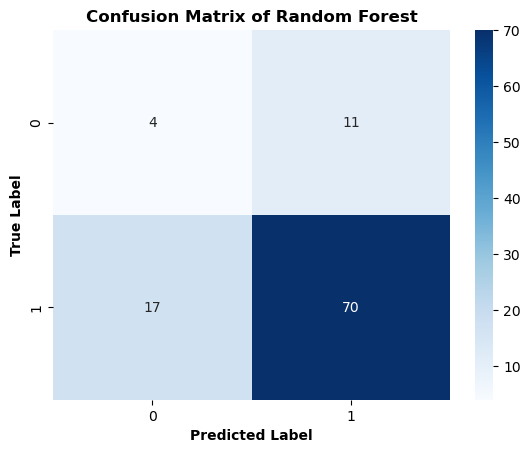

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm_test_rf,cmap="Blues",annot=True,
           xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predicted Label",fontweight='bold')
plt.ylabel("True Label",fontweight='bold')
plt.title("Confusion Matrix of Random Forest",fontweight='bold')

# disp = plot_confusion_matrix(classifier,x_test,y_test)
# disp.ax_.set_title("Confusion Matrix")

# # Customize the color map for better visualization (optional)
# plt.cm.get_cmap('Blues')

# # Display the plot
# plt.show()

Text(0.5, 1.0, 'Confusion Matrix of Random Forest')

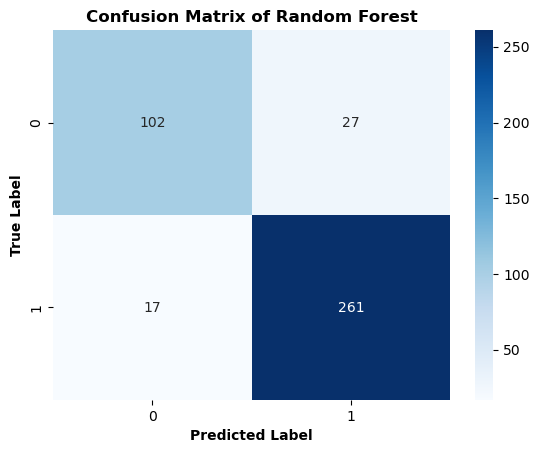

In [51]:
#---->For cm train data
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm_train_rf,cmap="Blues",annot=True,fmt='d',
           xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predicted Label",fontweight='bold')
plt.ylabel("True Label",fontweight='bold')
plt.title("Confusion Matrix of Random Forest",fontweight='bold')


In [52]:
from sklearn.model_selection import ShuffleSplit
s_split=ShuffleSplit(n_splits=10,test_size=0.2)
cross_val_score(model_rf,x,y,cv=s_split).mean()

0.6068627450980392

## XGBoost

In [53]:
#Final

import xgboost as xgb

model_xgb=xgb.XGBClassifier()

model_xgb.fit(x1_train,y1_train)
y1_pred_train_xgb=model_xgb.predict(x1_train)
acc_train=accuracy_score(y1_train,y1_pred_train_xgb)

y1_pred_test_xgb=model_xgb.predict(x1_test)
acc_test=accuracy_score(y1_test,y1_pred_test_xgb)
    
#         if((acc_train>=acc_test)&(acc_test>=0.7)):
print("TEST:",acc_test,"TRAIN:",acc_train)

precision_xgb=precision_score(y1_test,y1_pred_test_xgb)
recall_xgb=recall_score(y1_test,y1_pred_test_xgb)
f1_xgb=f1_score(y1_test,y1_pred_test_xgb,average='macro')

print("precision:",precision_xgb)
print("recall:",recall_xgb)
print("f_macro:",f1_xgb)

# y_pred_xgb=model_xgb.decision_function(x_test)
probs_xgb=model_xgb.predict_proba(x1_test)


#---->
cm_train_xgb=confusion_matrix(y1_train, y1_pred_train_xgb)
cm_test_xgb=confusion_matrix(y1_test, y1_pred_test_xgb)

print("TRAIN:",cm_train_xgb,"\n TEST:",cm_test_xgb)

kfold_validation=KFold(10)
print("Cross_val:",cross_val_score(model_xgb,x,y,cv=kfold_validation).mean())
#---->

# import seaborn as sns
# import matplotlib.pyplot as plt
# sns.heatmap(cm_test_xgb,cmap="Blues",annot=True,fmt='d',
#            xticklabels=[0,1],yticklabels=[0,1])
# plt.xlabel("Predicted Label",fontweight='bold')
# plt.ylabel("True Label",fontweight='bold')
# plt.title("Confusion Matrix of XGBoost",fontweight='bold')

# disp = plot_confusion_matrix(classifier,x_test,y_test)
# disp.ax_.set_title("Confusion Matrix")

# # Customize the color map for better visualization (optional)
# plt.cm.get_cmap('Blues')

# # Display the plot
plt.show()

TEST: 0.7156862745098039 TRAIN: 0.8648648648648649
precision: 0.8717948717948718
recall: 0.7816091954022989
f_macro: 0.5403263403263404
TRAIN: [[ 88  41]
 [ 14 264]] 
 TEST: [[ 5 10]
 [19 68]]
Cross_val: 0.5814117647058822


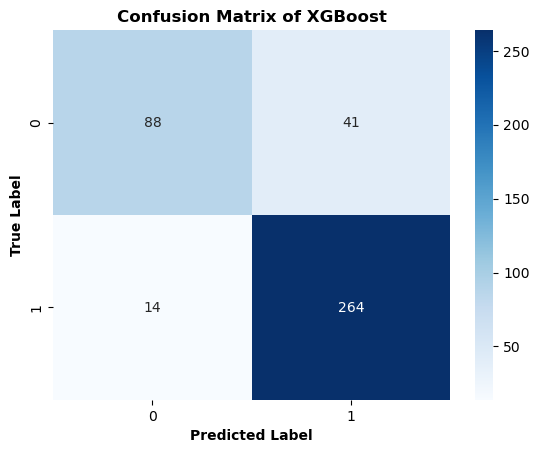

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm_train_xgb,cmap="Blues",annot=True,fmt='d',
           xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predicted Label",fontweight='bold')
plt.ylabel("True Label",fontweight='bold')
plt.title("Confusion Matrix of XGBoost",fontweight='bold')

# disp = plot_confusion_matrix(classifier,x_test,y_test)
# disp.ax_.set_title("Confusion Matrix")

# # Customize the color map for better visualization (optional)
# plt.cm.get_cmap('Blues')

# # Display the plot
plt.show()

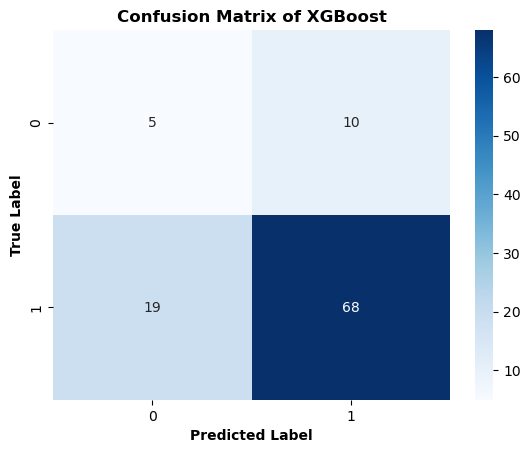

In [55]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm_test_xgb,cmap="Blues",annot=True,fmt='d',
           xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predicted Label",fontweight='bold')
plt.ylabel("True Label",fontweight='bold')
plt.title("Confusion Matrix of XGBoost",fontweight='bold')

# disp = plot_confusion_matrix(classifier,x_test,y_test)
# disp.ax_.set_title("Confusion Matrix")

# # Customize the color map for better visualization (optional)
# plt.cm.get_cmap('Blues')

# # Display the plot
plt.show()

In [56]:
from sklearn.model_selection import ShuffleSplit
s_split=ShuffleSplit(n_splits=10,test_size=0.2)
cross_val_score(model_xgb,x,y,cv=s_split).mean()

0.5647058823529412

## ROC Curve of all the diff models

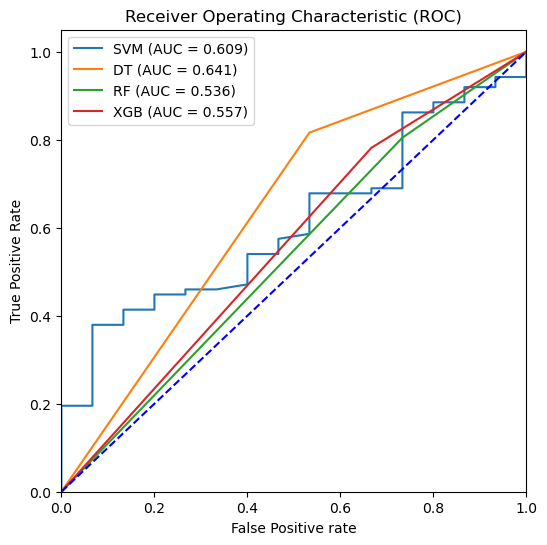

[0.         0.         0.         0.         0.         0.
 0.         0.06666667 0.06666667 0.06666667 0.13333333 0.13333333
 0.13333333 0.2        0.2        0.26666667 0.26666667 0.33333333
 0.4        0.4        0.4        0.46666667 0.46666667 0.53333333
 0.53333333 0.53333333 0.53333333 0.66666667 0.66666667 0.73333333
 0.73333333 0.8        0.8        0.86666667 0.86666667 0.93333333
 0.93333333 1.         1.        ] [0.         0.01149425 0.06896552 0.09195402 0.14942529 0.17241379
 0.1954023  0.1954023  0.2183908  0.37931034 0.37931034 0.40229885
 0.4137931  0.4137931  0.44827586 0.44827586 0.45977011 0.45977011
 0.47126437 0.50574713 0.54022989 0.54022989 0.57471264 0.5862069
 0.59770115 0.63218391 0.67816092 0.67816092 0.68965517 0.68965517
 0.86206897 0.86206897 0.88505747 0.88505747 0.91954023 0.91954023
 0.94252874 0.94252874 1.        ] [2 1 0]


In [57]:
from sklearn.metrics import roc_curve,auc

# y_scores=model_xgb.predict_proba(x_test)[:,1]
svm_fpr,svm_tpr,threshold=roc_curve(y1_test,y1_pred_test_svm)
auc_svm=auc(svm_fpr,svm_tpr)

logr_fpr,logr_tpr,threshold=roc_curve(y1_test,y1_pred_Logistic_R)
auc_logr=auc(logr_fpr,logr_tpr)

# naive_fpr,naive_tpr,threshold=roc_curve(y1_test,probs_naive)
# auc_naive=auc(naive_fpr,naive_tpr)

# knn_fpr,knn_tpr,threshold=roc_curve(y_test,y_predicted_test_knn)
# auc_knn=auc(knn_fpr,knn_tpr)

dt_fpr,dt_tpr,threshold=roc_curve(y1_test,y1_predicted_test_dt)
auc_dt=auc(dt_fpr,dt_tpr)

rf_fpr,rf_tpr,threshold=roc_curve(y1_test,y1_test_pred_rf)
auc_rf=auc(rf_fpr,rf_tpr)

xgb_fpr,xgb_tpr,threshold=roc_curve(y1_test,y1_pred_test_xgb)
auc_xgb=auc(xgb_fpr,xgb_tpr)

plt.figure(figsize=(6,6),dpi=100)
plt.plot(svm_fpr,svm_tpr,linestyle='-',label='SVM (AUC = %0.3f)' % auc_svm)
#plt.plot(knn_fpr,knn_tpr,linestyle='-',label='KNN (AUC = %0.3f)' % auc_knn)
plt.plot(dt_fpr,dt_tpr,linestyle='-',label='DT (AUC = %0.3f)' % auc_dt)
plt.plot(rf_fpr,rf_tpr,linestyle='-',label='RF (AUC = %0.3f)' % auc_rf)
#plt.plot(logr_fpr,logr_tpr,linestyle='-',label='Log_R (AUC = %0.3f)' % auc_logr)
# plt.plot(naive_fpr,naive_tpr,linestyle='-',label='Naive (AUC = %0.3f)' % auc_naive)
plt.plot(xgb_fpr,xgb_tpr,linestyle='-',label='XGB (AUC = %0.3f)' % auc_xgb)



# plt.plot(fpr,tpr,label='ROC curve (area= %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])

plt.xlabel('False Positive rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')

plt.legend()

plt.show()
print(svm_fpr,svm_tpr,threshold)